# Statsmodels
For implementation of Hodrick-Prescott filter we'll be using Statsmodels package. Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

## Using Statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series  yt  into a trend component  τt  and a cyclical component  ct 

yt=τt+ct


## Perform standard imports and load the dataset
For this task we'll be using a macroeconomics dataset:
Real Gross Domestic Product Data for 1947Q1 - 2020Q1

Source: https://fred.stlouisfed.org/series/GDPC1

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GDPC1.csv to GDPC1.csv


In [7]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded["GDPC1.csv"]),index_col="DATE",parse_dates=True)

In [8]:
df.head()

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 1947-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDPC1   293 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


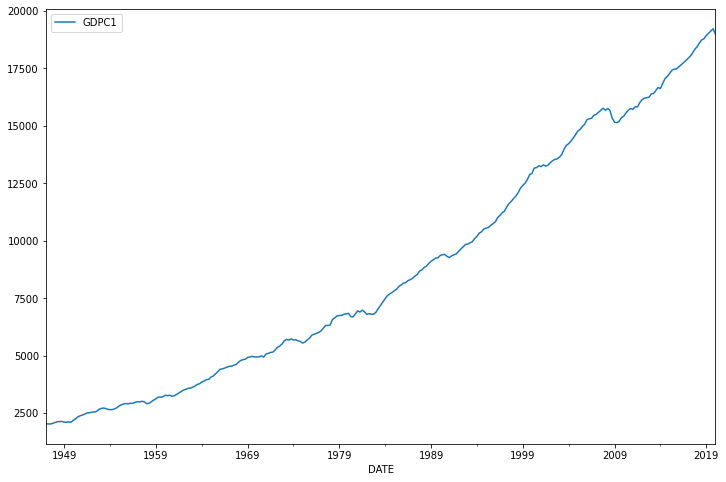

In [10]:
# Visualize
df.plot(figsize=(12,8));

In [12]:
# Tuple unpacking
# When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.
gdp_cycle, gdp_trend = hpfilter(df["GDPC1"], lamb=1600)

In [13]:
type(gdp_cycle)

pandas.core.series.Series

In [24]:
# Plot Trend and Cycle

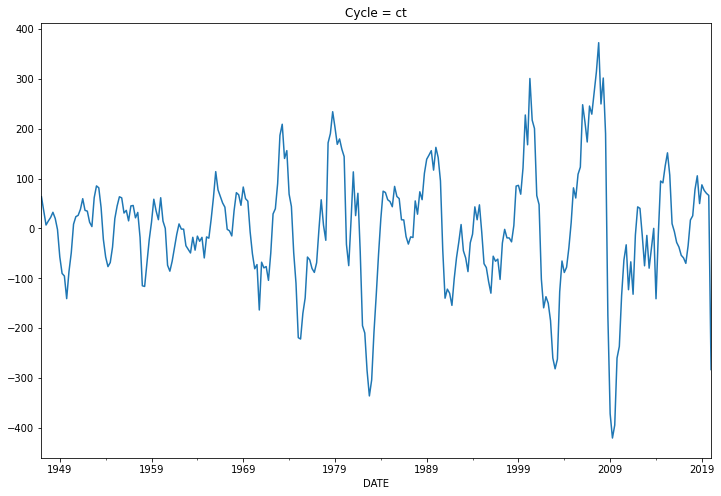

In [23]:
gdp_cycle.plot(figsize=(12,8),title="Cycle = ct");

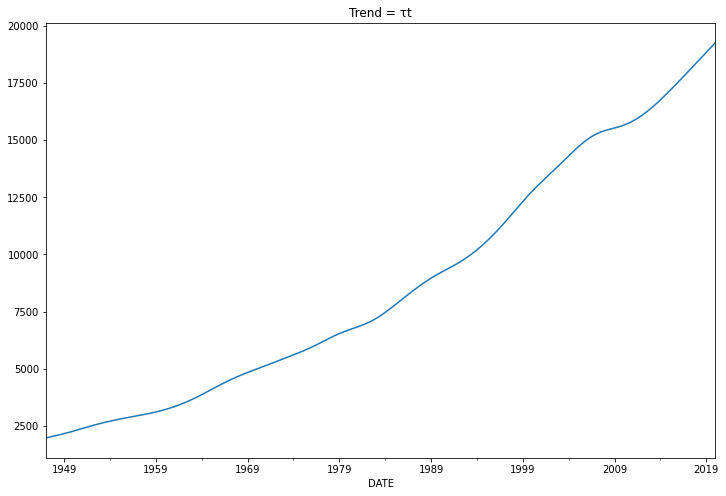

In [19]:
gdp_trend.plot(figsize=(12,8),title = "Trend = τt");

In [20]:
# Create a new column 
df["Trend"] = gdp_trend

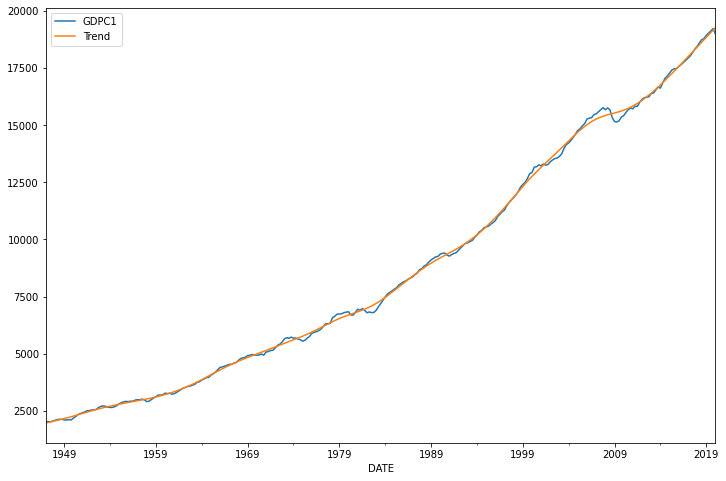

In [21]:
df.plot(figsize=(12,8)).autoscale(axis = "x", tight = True);

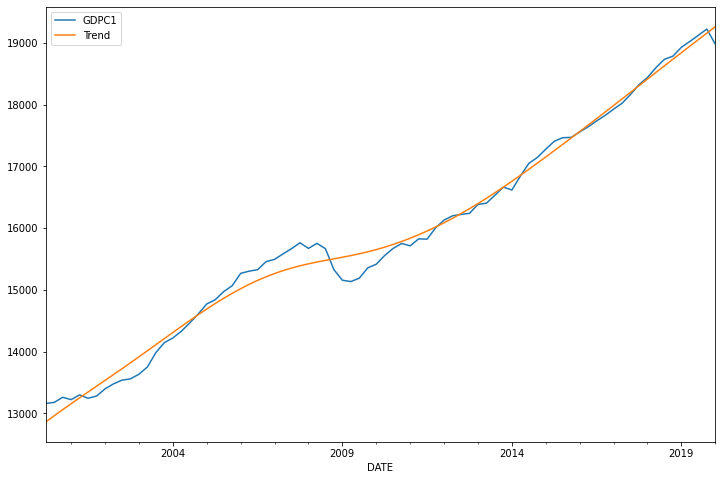

In [22]:
df['2000-01-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);